In [1]:
!pip install opendatasets --quiet
import opendatasets as od
od.download("https://www.kaggle.com/datasets/jessicali9530/celeba-dataset/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: tanmay01bhatt
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/jessicali9530/celeba-dataset


100%|██████████| 1.33G/1.33G [00:08<00:00, 159MB/s]


In [2]:
import numpy as np
import pandas as pd
import os
from PIL import Image
import torch

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device available: ", device)

Device available:  cuda


In [4]:
df = pd.read_csv("/content/celeba-dataset/list_attr_celeba.csv")
df.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


converting all -1 to 0


# Preprocessing

In [5]:
df.columns

Index(['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young'],
      dtype='object')

In [6]:
df.replace(to_replace=-1, value=0, inplace=True)
df.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,0,1,1,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
1,000002.jpg,0,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2,000003.jpg,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,000004.jpg,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,1
4,000005.jpg,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [7]:
base_dir = '/content/celeba-dataset/img_align_celeba/img_align_celeba'

In [8]:
os.listdir(base_dir)[:5]

['021369.jpg', '168352.jpg', '154478.jpg', '027634.jpg', '113561.jpg']

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

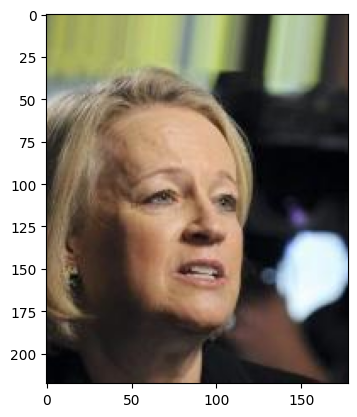

In [10]:
for img in os.listdir(base_dir):
  path = os.path.join(base_dir, img)
  image = Image.open(path)
  plt.imshow(image)
  break

In [11]:
df["image_path"] = df["image_id"].apply(lambda x: os.path.join(base_dir, x))
df.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young,image_path
0,000001.jpg,0,1,1,0,0,0,0,0,0,...,1,1,0,1,0,1,0,0,1,/content/celeba-dataset/img_align_celeba/img_a...
1,000002.jpg,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,/content/celeba-dataset/img_align_celeba/img_a...
2,000003.jpg,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,/content/celeba-dataset/img_align_celeba/img_a...
3,000004.jpg,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,1,1,0,1,/content/celeba-dataset/img_align_celeba/img_a...
4,000005.jpg,0,1,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,/content/celeba-dataset/img_align_celeba/img_a...


In [12]:
new_df = df[["image_path", "Male"]].rename(columns={"Male": "gender"})

In [13]:
new_df.head()

,image_path,gender
0,/content/celeba-dataset/img_align_celeba/img_a...,0
1,/content/celeba-dataset/img_align_celeba/img_a...,0
2,/content/celeba-dataset/img_align_celeba/img_a...,1
3,/content/celeba-dataset/img_align_celeba/img_a...,0
4,/content/celeba-dataset/img_align_celeba/img_a...,0


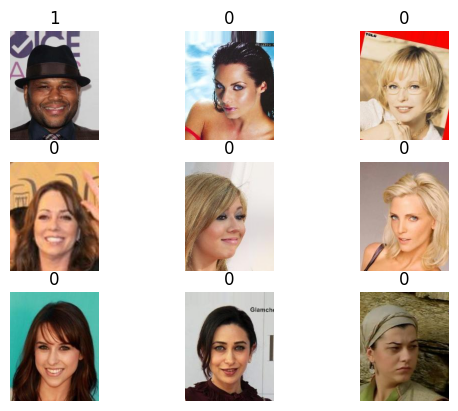

In [14]:
fig,axes = plt.subplots(3,3)
for i in range (3):
  for j in range(3):
    row = new_df.sample(1).iloc[0]  # Random row
    img = Image.open(row['image_path']).convert('RGB')
    axes[i,j].imshow(img)
    axes[i,j].set_title(row['gender'])
    axes[i,j].axis('off')

plt.show()

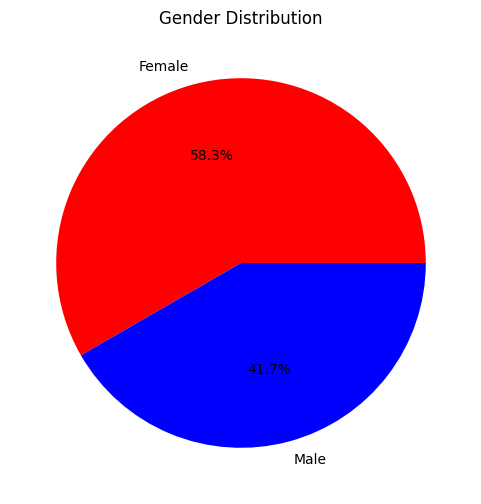

In [15]:
gender_count = new_df["gender"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(
    gender_count,
    labels = ["Female","Male"],
    autopct='%1.1f%%',
    colors = ["red",'blue']
)
plt.title("Gender Distribution")
plt.show()

# Data Split

In [16]:
new_df.shape

(202599, 2)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train_df, temp_df = train_test_split(
    new_df, test_size=0.3, random_state=42, stratify=new_df["gender"]
)
val_df, test_df = train_test_split(
    temp_df, test_size=0.5, random_state=42, stratify=temp_df["gender"]
)

In [19]:
train_df.shape,val_df.shape,test_df.shape

((141819, 2), (30390, 2), (30390, 2))

In [20]:
img = Image.open(train_df.iloc[0]["image_path"])
img.size #wd,ht

(178, 218)

# Transforms

In [21]:
from torchvision import transforms

In [22]:
train_transforms = transforms.Compose([transforms.Resize((224,224)),
                                       transforms.RandomRotation(10),
                                       transforms.RandomHorizontalFlip(p=0.5),
                                       transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                       ])

val_transforms = transforms.Compose([transforms.Resize((224,224)),
                                     transforms.ToTensor(),
                                     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

                                     ])

In [23]:
(train_df.shape[0])

141819

# Custom Dataset

In [24]:
from torch.utils.data import Dataset,DataLoader

In [25]:
class CustomImageDataset(Dataset):

  def __init__(self,df,transform=None):
    self.df =df
    self.transform = transform


  def __len__(self):
    return self.df.shape[0]

  def __getitem__(self,index):
    img_path = self.df.iloc[index,0]
    label = self.df.iloc[index,1]

    img = Image.open(img_path).convert('RGB')

    if self.transform :
      img = self.transform(img)

    return img,label

In [26]:
train_dataset = CustomImageDataset(train_df,transform=train_transforms)
test_dataset = CustomImageDataset(test_df,transform=val_transforms)
val_dataset = CustomImageDataset(val_df,transform=val_transforms)


In [27]:
val_dataset.__len__(),train_dataset.__len__(),test_dataset.__len__()

(30390, 141819, 30390)

In [28]:
img,label = train_dataset[0]
img.shape,label

(torch.Size([3, 224, 224]), np.int64(1))

# Dataloaders

In [29]:
train_loader = DataLoader(train_dataset,batch_size=64,shuffle=True)
val_loader = DataLoader(val_dataset,batch_size=64,shuffle=False)
test_loader = DataLoader(test_dataset,batch_size=64,shuffle=False)

# Model

In [30]:
import torch.nn as nn
import torch.nn.functional as F

In [31]:
from torchvision.models import efficientnet_b0

base_model = efficientnet_b0(pretrained=True)

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth


100%|██████████| 20.5M/20.5M [00:00<00:00, 117MB/s] 


In [32]:
print(base_model)

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [33]:
# freeze all layers
for param in base_model.parameters():
  param.requires_grad=False

In [34]:
#unfreeze the last block (index=8)
for param in base_model.features[8].parameters():
  param.requires_grad=True

In [35]:
# replacing the classifier
base_model.classifier = nn.Sequential(
    nn.Linear(1280,512),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(512,2)
)

In [36]:
for name, param in base_model.named_parameters():
    print(name, param.requires_grad)

features.0.0.weight False
features.0.1.weight False
features.0.1.bias False
features.1.0.block.0.0.weight False
features.1.0.block.0.1.weight False
features.1.0.block.0.1.bias False
features.1.0.block.1.fc1.weight False
features.1.0.block.1.fc1.bias False
features.1.0.block.1.fc2.weight False
features.1.0.block.1.fc2.bias False
features.1.0.block.2.0.weight False
features.1.0.block.2.1.weight False
features.1.0.block.2.1.bias False
features.2.0.block.0.0.weight False
features.2.0.block.0.1.weight False
features.2.0.block.0.1.bias False
features.2.0.block.1.0.weight False
features.2.0.block.1.1.weight False
features.2.0.block.1.1.bias False
features.2.0.block.2.fc1.weight False
features.2.0.block.2.fc1.bias False
features.2.0.block.2.fc2.weight False
features.2.0.block.2.fc2.bias False
features.2.0.block.3.0.weight False
features.2.0.block.3.1.weight False
features.2.0.block.3.1.bias False
features.2.1.block.0.0.weight False
features.2.1.block.0.1.weight False
features.2.1.block.0.1.bia

In [37]:
model = base_model.to(device)

In [38]:
from torchsummary import summary
summary(model,input_size=(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             864
       BatchNorm2d-2         [-1, 32, 112, 112]              64
              SiLU-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]             288
       BatchNorm2d-5         [-1, 32, 112, 112]              64
              SiLU-6         [-1, 32, 112, 112]               0
 AdaptiveAvgPool2d-7             [-1, 32, 1, 1]               0
            Conv2d-8              [-1, 8, 1, 1]             264
              SiLU-9              [-1, 8, 1, 1]               0
           Conv2d-10             [-1, 32, 1, 1]             288
          Sigmoid-11             [-1, 32, 1, 1]               0
SqueezeExcitation-12         [-1, 32, 112, 112]               0
           Conv2d-13         [-1, 16, 112, 112]             512
      BatchNorm2d-14         [-1, 16, 1

# Loss and Optimizer

In [39]:
from torch.optim import Adam
from torch.optim import lr_scheduler

In [40]:
loss_fn  = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(),lr=1e-3,weight_decay=1e-4)

In [41]:
scheduler = lr_scheduler.ReduceLROnPlateau(optimizer,mode='min',factor=0.1,patience=2)

# Training

In [42]:
epochs=10

In [43]:
def train(model,optimizer,loss_fn,train_loader,val_loader,scheduler,epochs):



  for epoch in range(epochs):

    train_loss = 0
    val_loss = 0
    train_acc = 0
    val_acc = 0

    train_correct_pred = 0
    train_total_pred = 0
    val_correct_pred = 0
    val_total_pred = 0

    model.train()
    for batch in train_loader:
      input,label = batch
      input = input.to(device)
      label = label.to(device)

      optimizer.zero_grad() #reset gradient
      output = model(input)
      loss = loss_fn(output,label)
      train_loss += loss.item()
      loss.backward() #gradient
      optimizer.step() #update wts

      #accuracy
      pred = torch.argmax(output,dim=1)
      train_correct_pred += (pred==label).sum().item()
      train_total_pred += len(label)

    train_loss = train_loss/len(train_loader)  # avg loss per batch
    train_acc = train_correct_pred/train_total_pred
    model.eval()

    with torch.no_grad():
      for input,label in val_loader:
        input = input.to(device)
        label = label.to(device)

        output = model(input)
        loss = loss_fn(output,label)
        val_loss += loss.item()

        # accuracy
        pred = torch.argmax(output,dim=1)
        val_correct_pred += (pred==label).sum().item()
        val_total_pred += len(label)

    val_loss = val_loss/len(val_loader)
    val_acc = val_correct_pred/val_total_pred

    current_lr = optimizer.param_groups[0]['lr']


    print(f"Epoch: {epoch+1}/{epochs},Training Loss: {train_loss:.4f},Validation Loss: {val_loss:.4f},Training Accuracy: {train_acc*100:.2f},Validation Accuracy: {val_acc*100:.2f},Learning Rate : {current_lr:.6f}" )
    print('-'*125)

    scheduler.step(val_loss)

In [44]:
train(model,optimizer,loss_fn,train_loader,val_loader,scheduler,epochs)

Epoch: 1/10,Training Loss: 0.1763,Validation Loss: 0.1271,Training Accuracy: 92.88,Validation Accuracy: 95.05,Learning Rate : 0.001000
-----------------------------------------------------------------------------------------------------------------------------
Epoch: 2/10,Training Loss: 0.1488,Validation Loss: 0.1195,Training Accuracy: 94.01,Validation Accuracy: 95.32,Learning Rate : 0.001000
-----------------------------------------------------------------------------------------------------------------------------
Epoch: 3/10,Training Loss: 0.1422,Validation Loss: 0.1161,Training Accuracy: 94.36,Validation Accuracy: 95.46,Learning Rate : 0.001000
-----------------------------------------------------------------------------------------------------------------------------
Epoch: 4/10,Training Loss: 0.1363,Validation Loss: 0.1119,Training Accuracy: 94.59,Validation Accuracy: 95.55,Learning Rate : 0.001000
----------------------------------------------------------------------------------

# Testing

In [45]:
with torch.no_grad():
    test_loss = 0
    test_acc = 0
    correct_pred = 0
    total_pred = 0
    for input,label in test_loader:
        input = input.to(device)
        label = label.to(device)

        output = model(input)
        loss = loss_fn(output,label)
        test_loss += loss.item()

        # accuracy
        pred = torch.argmax(output,dim=1)
        correct_pred += (pred==label).sum().item()
        total_pred += len(label)

    test_loss = test_loss/len(val_loader)
    test_acc = correct_pred/total_pred

print(f"Testing Loss is : {test_loss:.4f} and Testing Accuracy is {test_acc*100:.2f}")

Testing Loss is : 0.1012 and Testing Accuracy is 96.15


# Prediction

In [47]:
def predict_image(image_path):
  image = Image.open(image_path).convert('RGB')
  image = val_transforms(image).to(device)

  output = model(image.unsqueeze(0))
  output = torch.argmax(output, axis = 1).item()
  return output



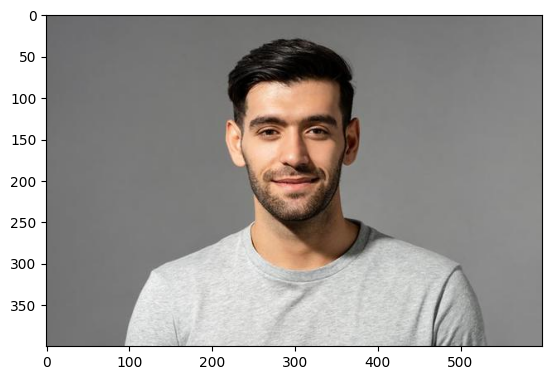


Prediction: 



1

In [48]:
## Visualize the image
image = Image.open("/content/man.jpg")
plt.imshow(image)
plt.show()


## Predict
print()
print("Prediction: \n")
predict_image("/content/man.jpg")

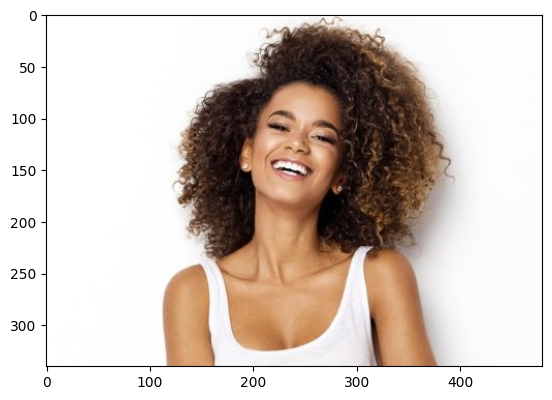


Prediction: 



0

In [49]:
## Visualize the image
image = Image.open("/content/woman.jpg")
plt.imshow(image)
plt.show()


## Predict
print()
print("Prediction: \n")
predict_image("/content/woman.jpg")